# Example 2: Classic Zeno effect

The classic Zeno effect analyzes the intensity transmitted by a certain number of perfect polarizers with equally spaced azimuths between 0º and 90º. Using only two polarizers, as their transmission axes are perpendicular to each other, the output intensity of the system will be zero. As the number of polarizers increases, the output intensity will also increase. In the limit of infinite polarizers, if the incident light is linearly polarized with the same azimuth than the first polarizer, the output wave will have the same intensity than the incident light. 

This example will show the classic Zeno effect both in Jones and Mueller formalisms. We will also analyze the influence of using imperfect polarizers.

## Jones formalism

Let us start by Jones formalism. Jones formalism is easier to visualize and understand.

### Perfect polarizers

This is the easiest case. Start by importing all the required modules and classes.

In [1]:
from py_pol import degrees
from py_pol.jones_vector import Jones_vector
from py_pol.jones_matrix import Jones_matrix

import matplotlib.pyplot as plt
import numpy as np

We will work using linear polarization with the same azimuth as the first polarizer (0º).

In [2]:
# Incident wave
E0 = Jones_vector('Incident wave')
E0.linear_light(intensity=1, azimuth=0*degrees)
print(E0)

Incident wave = 
[+1.000]   
[+0.000]   



Now, we will construct two arrays, one with the number of polarizers and other with the output intensity.

In [3]:
Nmax = 30
Narray = np.arange(2,Nmax+1)
J = Jones_matrix('System')
I = np.zeros(Nmax-1)

# For loop to calculate the intensities
for ind, N in enumerate(Narray):
    # Create the system of polarizers
    angles = np.linspace(90*degrees, 0*degrees, N) # Start by 90º and end in 0º because the rightest  element is the first to be crossed by the light wave
    J.diattenuator_perfect(azimuth=angles)
    # Multiply them
    J.prod()
    # Multiply the system matrix by the incident light wave to obtain the output
    E_final = J * E0
    # Store the intensity
    I[ind] = E_final.parameters.intensity(out_number=False)

Finally, plot the result.

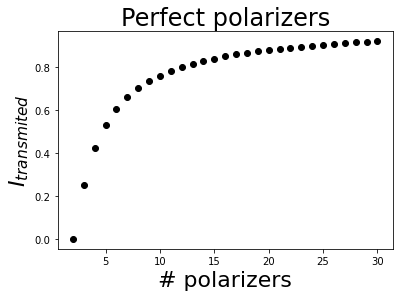

In [4]:
# Plot the result
plt.figure()
plt.plot(Narray, I, 'ko')
plt.xlabel('# polarizers', fontsize=22)
plt.ylabel('$I_{transmited}$', fontsize=22)
plt.title('Perfect polarizers', fontsize=24);

It is possible to show how the transmitted intensity gets closer to 1 using logarithmic scale.

In [5]:
Npoins = 100
Narray = np.logspace(1,5, Npoins)
J = Jones_matrix('System')
I = np.zeros(Npoins)

# For loop to calculate the intensities
for ind, N in enumerate(Narray):
    # Create the system of polarizers
    angles = np.linspace(90*degrees, 0*degrees, int(N)) # Start by 90º and end in 0º because the rightest  element is the first to be crossed by the light wave
    J.diattenuator_perfect(azimuth=angles)
    # Multiply them
    J.prod()
    # Multiply the system matrix by the incident light wave to obtain the output
    E_final = J * E0
    # Store the intensity
    I[ind] = E_final.parameters.intensity(out_number=False)

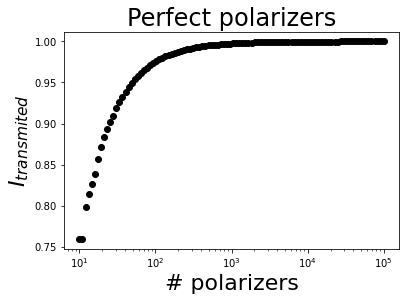

In [6]:
# Plot the result
plt.figure()
plt.semilogx(Narray, I, 'ko')
plt.xlabel('# polarizers', fontsize=22)
plt.ylabel('$I_{transmited}$', fontsize=22)
plt.title('Perfect polarizers', fontsize=24);

### Imperfect polarizers

Imperfect polarizers will have a leak ($T_{min}$ > 0) and, much more important for the Zeno effect, will not perfectly transmit the transmission state ($T_{max}$ < 1). We will use some values of commercial polarizers with anti-reflecting coating: 

* $T_{max}$ = 0.99.
* $T_{min}$ = 1e-4.

In [7]:
Nmax = 30
Narray = np.arange(2,Nmax+1)
J = Jones_matrix('System')
I = np.zeros(Nmax-1)

# For loop to calculate the intensities
for ind, N in enumerate(Narray):
    # Create the system of polarizers
    angles = np.linspace(90*degrees, 0*degrees, N) # Start by 90º and end in 0º because the rightest  element is the first to be crossed by the light wave
    J.diattenuator_linear(Tmax=0.99, Tmin=1e-4, azimuth=angles)
    # Multiply them
    J.prod()
    # Multiply the system matrix by the incident light wave to obtain the output
    E_final = J * E0
    # Store the intensity
    I[ind] = E_final.parameters.intensity(out_number=False)

The maximum obtained intensity is 0.7201695688246019 for 17 polarizers.


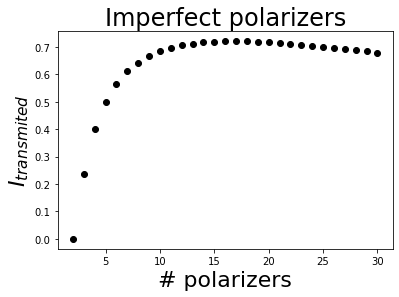

In [8]:
# Plot the result
plt.figure()
plt.plot(Narray, I, 'ko')
plt.xlabel('# polarizers', fontsize=22)
plt.ylabel('$I_{transmited}$', fontsize=22)
plt.title('Imperfect polarizers', fontsize=24)

# Find the maximum
Imax = np.max(I)
Nmax = np.argmax(I) + 2
print('The maximum obtained intensity is {} for {} polarizers.'.format(Imax, Nmax))

In this case, the increase in transmission expected by the increase of the number of polarizers does not compensate the extra loss produced by the imperfect polarizer transmission. This produces a maximum of the transmitted intensity (using 17 polarizers for this data).

## Mueller-Stokes formalism

Mueller-Stokes formalism is more complicated than Jones formalism, but allows working with partial polarization states. This example uses completely polarized light, but it is a good example to start using *Mueller* and *Stokes* classes.

### Perfect polarizers

This is the easiest case. Start by importing all the required modules and classes.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from py_pol import degrees
from py_pol.stokes import Stokes
from py_pol.mueller import Mueller

We will work using linear polarization with the same azimuth as the first polarizer (0º).

In [10]:
# Incident wave
S0 = Stokes('Incident wave')
S0.linear_light(intensity=1, azimuth=0*degrees)
print(S0)

Incident wave = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   



Now, we will construct two arrays, one with the number of polarizers and other with the output intensity.

In [11]:
Nmax = 30
Narray = np.arange(2,Nmax+1)
J = Mueller('System')
I = np.zeros(Nmax-1)

# For loop to calculate the intensities
for ind, N in enumerate(Narray):
    # Create the system of polarizers
    angles = np.linspace(90*degrees, 0*degrees, N) # Start by 90º and end in 0º because the rightest  element is the first to be crossed by the light wave
    J.diattenuator_perfect(azimuth=angles)
    # Multiply them
    J.prod()
    # Multiply the system matrix by the incident light wave to obtain the output
    S_final = J * S0
    # Store the intensity
    I[ind] = S_final.parameters.intensity(out_number=False)

Finally, plot the result.

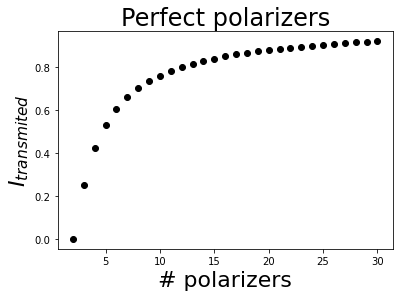

In [12]:
# Plot the result
plt.figure()
plt.plot(Narray, I, 'ko')
plt.xlabel('# polarizers', fontsize=22)
plt.ylabel('$I_{transmited}$', fontsize=22)
plt.title('Perfect polarizers', fontsize=24);

It is possible to show how the transmitted intensity gets closer to 1 using logarithmic scale.

In [13]:
Npoins = 100
Narray = np.logspace(1,5, Npoins)
J = Mueller('System')
I = np.zeros(Npoins)

# For loop to calculate the intensities
for ind, N in enumerate(Narray):
    # Create the system of polarizers
    angles = np.linspace(90*degrees, 0*degrees, int(N)) # Start by 90º and end in 0º because the rightest  element is the first to be crossed by the light wave
    J.diattenuator_perfect(azimuth=angles)
    # Multiply them
    J.prod()
    # Multiply the system matrix by the incident light wave to obtain the output
    S_final = J * S0
    # Store the intensity
    I[ind] = S_final.parameters.intensity(out_number=False)

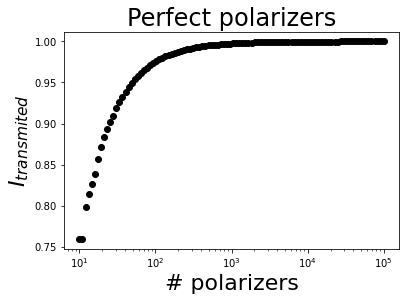

In [14]:
# Plot the result
plt.figure()
plt.semilogx(Narray, I, 'ko')
plt.xlabel('# polarizers', fontsize=22)
plt.ylabel('$I_{transmited}$', fontsize=22)
plt.title('Perfect polarizers', fontsize=24);

### Imperfect polarizers

Imperfect polarizers will have a leak ($T_{min}$ > 0) and, much more important for the Zeno effect, will not perfectly transmit the transmission state ($T_{max}$ < 1). We will use some values of commercial polarizers with anti-reflecting coating: 

* $T_{max}$ = 0.99.
* $T_{min}$ = 1e-4.

In [15]:
Nmax = 30
Narray = np.arange(2,Nmax+1)
J = Mueller('System')
I = np.zeros(Nmax-1)

# For loop to calculate the intensities
for ind, N in enumerate(Narray):
    # Create the system of polarizers
    angles = np.linspace(90*degrees, 0*degrees, N) # Start by 90º and end in 0º because the rightest  element is the first to be crossed by the light wave
    J.diattenuator_linear(Tmax=0.99, Tmin=1e-4, azimuth=angles)
    # Multiply them
    J.prod()
    # Multiply the system matrix by the incident light wave to obtain the output
    S_final = J * S0
    # Store the intensity
    I[ind] = S_final.parameters.intensity(out_number=False)

The maximum obtained intensity is 0.720169568824601 for 17 polarizers.


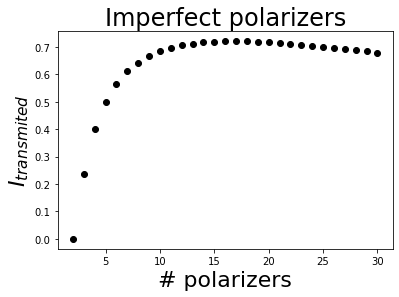

In [16]:
# Plot the result
plt.figure()
plt.plot(Narray, I, 'ko')
plt.xlabel('# polarizers', fontsize=22)
plt.ylabel('$I_{transmited}$', fontsize=22)
plt.title('Imperfect polarizers', fontsize=24)

# Find the maximum
Imax = np.max(I)
Nmax = np.argmax(I) + 2
print('The maximum obtained intensity is {} for {} polarizers.'.format(Imax, Nmax))